## Mercedes-Benz Greener Manufacturing

#### Reduce the time a Mercedes-Benz spends on the test bench.

Problem Statement Scenario:
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.

Actions to be performed:

If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
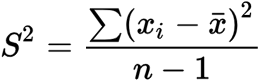

Check for null and unique values for test and train sets.

Apply label encoder.

Perform dimensionality reduction.

Predict your test_df values using XGBoost.

#### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

#### Loading data

In [2]:
mbtrain = pd.read_csv(r"C:\Users\DELL\Desktop\Datasets\mercedestrain.csv")
mbtest = pd.read_csv(r"C:\Users\DELL\Desktop\Datasets\mercedestest.csv")

In [3]:
 # no.of rowns and columns
print(mbtrain.shape)
print(mbtest.shape)

(4209, 378)
(4209, 377)


In [4]:
mbtrain.head(3)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0


In [5]:
mbtest.head(3)

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0


In [6]:
#Missing data
print(mbtrain.isnull().sum())

ID      0
y       0
X0      0
X1      0
X2      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 378, dtype: int64


In [7]:
mbtrain.describe()
# summary of each attribute

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
print(mbtest.isnull().sum())

ID      0
X0      0
X1      0
X2      0
X3      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 377, dtype: int64


In [9]:
print(mbtrain.nunique())

ID      4209
y       2545
X0        47
X1        27
X2        44
        ... 
X380       2
X382       2
X383       2
X384       2
X385       2
Length: 378, dtype: int64


In [10]:
mbtrain.columns

Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=378)

In [11]:
mbtest.columns

Index(['ID', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X10',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=377)

In [12]:
# Extracting 'y' and 'ID' columns as NumPy arrays
y_data = mbtrain['y'].values
id_data = mbtrain['ID'].values

In [13]:
# List of columns excluding 'ID' and 'y'
Updated_data = list(set(mbtrain.columns) - set(['ID', 'y']))

In [14]:
# column with variance = 0
for c in Updated_data:
    cardinality = len (np.unique(mbtrain[c]))
    if cardinality == 1:
        mbtrain = mbtrain.drop(c, axis=1)
        mbtest = mbtest.drop(c, axis=1)

In [15]:
mbtrain.isna()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4205,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4206,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4207,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
mbtest.isna()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4205,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4206,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4207,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
mbtrain[mbtrain.duplicated()]

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385


In [18]:
mbtest[mbtest.duplicated()]

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385


In [19]:
mbtrain['X0'].unique()

array(['k', 'az', 't', 'al', 'o', 'w', 'j', 'h', 's', 'n', 'ay', 'f', 'x',
       'y', 'aj', 'ak', 'am', 'z', 'q', 'at', 'ap', 'v', 'af', 'a', 'e',
       'ai', 'd', 'aq', 'c', 'aa', 'ba', 'as', 'i', 'r', 'b', 'ax', 'bc',
       'u', 'ad', 'au', 'm', 'l', 'aw', 'ao', 'ac', 'g', 'ab'],
      dtype=object)

In [20]:
mbtest['X0'].unique()

array(['az', 't', 'w', 'y', 'x', 'f', 'ap', 'o', 'ay', 'al', 'h', 'z',
       'aj', 'd', 'v', 'ak', 'ba', 'n', 'j', 's', 'af', 'ax', 'at', 'aq',
       'av', 'm', 'k', 'a', 'e', 'ai', 'i', 'ag', 'b', 'am', 'aw', 'as',
       'r', 'ao', 'u', 'l', 'c', 'ad', 'au', 'bc', 'g', 'an', 'ae', 'p',
       'bb'], dtype=object)

In [21]:
print(mbtrain.columns)


Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=366)


In [25]:
updatedtrain = mbtrain[Updated_data]
updatedtest = mbtest[Updated_data]

In [26]:
# Print column names of mbtrain
print(mbtrain.columns)

# Print column names of mbtest
print(mbtest.columns)

X = mbtrain.drop(['y'], axis=1)  # Assuming 'y' is the target variable
y = mbtrain['y']

Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=366)
Index(['ID', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X10',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=365)


In [27]:

for col in updatedtrain:
    LE = LabelEncoder()
    updatedtrain[col] = LE.fit_transform(updatedtrain[col])
updatedtrain.head()

NameError: name 'updatedtrain' is not defined

In [32]:
for col in Updatedtest:
    LE = LabelEncoder()
    Updatedtest[col] = LE.fit_transform(Updatedtest[col])
Updatedtest.head()

NameError: name 'Updatedtest' is not defined

In [ ]:
n_components = 6
pca = PCA(n_components, random_state = 420)
pca_train = pca.fit_transform(updatedtrain)
pca_test = pca.fit_transform(updatedtest)

In [ ]:
pca_train.shape

In [ ]:
pca_test.shape

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(pca_train, y_data, test_size = 0.2, random_state =  1)

In [ ]:
from sklearn.metrics import r2_score
import xgboost, time

In [ ]:
xgb_clf =xgboost.XGBRegressor()

In [ ]:
xgb_train = xgboost.DMatrix(X_train, label = Y_train)
xgb_test = xgboost.DMatrix(X_test, label= Y_test)
xgb_final_test = xgboost.DMatrix(pca_test)
xgb_ddirect_test = xgboost.DMatrix(updatedtest)

In [ ]:
from math import sqrt

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
xgb_reg = xgboost.XGBRegressor(learning_rate = 0.4, max_depth = 10, alpha = 6, n_estimators = 30)
model = xgb_reg.fit(X_train, Y_train)
print ('R-squared on train data :', model.score(X_train, Y_train))

In [ ]:
pca.fit(updatedtest)

In [ ]:
pca_test1 = pca.fit_transform(updatedtest)

In [ ]:
pca_test1.shape

In [ ]:
test_pred = model.predict(pca_test)
test_pred

In [ ]:
plt.figure(figsize=(12,6))
plt.hist(test_pred, bins = 11)
plt.xlabel('Test Data')
plt.ylabel('Distribution')
plt.show()
plt.savefig('hist_testdata.png')

In [ ]:

plt.figure(figsize=(12,6))
sns.distplot(test_pred, bins = 11)
plt.xlabel('Test Data')
plt.ylabel('Distribution')
plt.show()
plt.savefig('distplot_testdata.png')

In [ ]:



# Combine unique labels from both training and test sets
unique_labels = set(mbtrain.select_dtypes(include=['object']).stack().unique()) | set(mbtest.select_dtypes(include=['object']).stack().unique())

label_encoder = LabelEncoder()

# Fit on combined unique labels
label_encoder.fit(list(unique_labels))

# Transform both training and test sets
for column in mbtrain.select_dtypes(include=['object']).columns:
    mbtrain[column] = label_encoder.transform(mbtrain[column])
    mbtest[column] = label_encoder.transform(mbtest[column])
